## Homework Assignment 1
Importing and Cleaning Data

In this assignment, I import 3 different datasets, clean them up, and visualize them. 


In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
import requests
import json


## Dataset 1: Data on Global Terrorist Attacks

The first dataset I will examine contains information on terrorist attacks that occurred worldwide from 1970-2017. This data is in a CSV format.

In [105]:
# Import data
terrorism_data = pd.read_csv(r"C:\Users\Cole\Documents\Machine Learning\Homework 1\terror_data_final.csv")

Before diving into the data more thouroughly, let's take a look at what data we have.

In [106]:
# Take a cursory look at the data
print(terrorism_data.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002704e+11    2002.638997       6.467277      15.505644   
std    1.325955e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991020e+11    1991.000000       4.000000       8.000000   
50%    2.009020e+11    2009.000000       6.000000      15.000000   
75%    2.014080e+11    2014.000000       9.000000      23.000000   
max    2.017120e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

## Cleaning the Data

It looks like we have a lot of columns. Since we don't need all of them, we may want to trim some of them down a little.

In [107]:
#drop some unnecessary columns
terrorism_data = terrorism_data.drop(['eventid','approxdate','extended','region','latitude','longitude','specificity','vicinity' ], axis=1)

In [108]:
#Let's see what kind of data types we've got here
terrorism_data.dtypes

iyear                 int64
imonth                int64
iday                  int64
resolution           object
country               int64
country_txt          object
region_txt           object
provstate            object
city                 object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
alternative         float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
guncertain2         float64
guncertain3         float64
individual            int64
nperps              float64
nperpcap            float64
weaptype1             int64
weaptype1_txt       

In [109]:
# Let's see how many rows are missing data in each column
terrorism_data.isna().sum().sort_values(ascending=False)

guncertain3         181371
guncertain2         179736
resolution          179471
alternative         152680
nperps               71115
nperpcap             69489
corp1                42550
targsubtype1         10373
targsubtype1_txt     10373
natlty1               1559
natlty1_txt           1559
target1                636
city                   434
provstate              421
guncertain1            380
multiple                 1
doubtterr                1
region_txt               0
weaptype1_txt            0
country_txt              0
country                  0
crit2                    0
iday                     0
imonth                   0
crit1                    0
attacktype1              0
crit3                    0
success                  0
suicide                  0
weaptype1                0
attacktype1_txt          0
targtype1                0
targtype1_txt            0
gname                    0
individual               0
iyear                    0
dtype: int64

In [110]:
# Let's drop a few of those columns of missing data as well
terrorism_data = terrorism_data.drop(['guncertain3','guncertain2','resolution','alternative'], axis=1)

## Exploring Dataset 1
Ok, now that we've cleaned up this data on terrorist attacks, let's explore some of the trends and insights. 

In [111]:
#aggregate terrorist attacks by country
terrorism_data['country_txt'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


We can see that the top 5 countries: Iraq, Pakistan, Afghanistan, India, and Columbia, have experienced significantly more terrorist attacks than the following 5 countries. It is interesting to note that Iraq, Pakistan, Afghanistan, and India are all pretty close in geography.

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

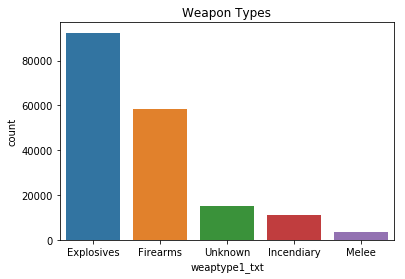

In [112]:
#Aggregate weapon types, plot top 5
print(terrorism_data['weaptype1_txt'].value_counts())
plot = sns.countplot(terrorism_data["weaptype1_txt"], order=terrorism_data.weaptype1_txt.value_counts().iloc[:5].index)
plot.set_title('Weapon Types')
plt.show()

We can see that explosives and firearms are by far the most common weapons used in terror attacks.

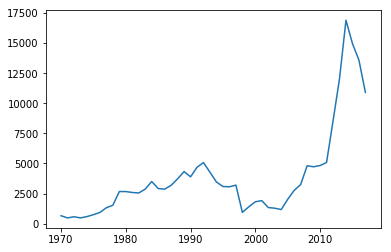

In [113]:
#track number of terrorist attacks per year
timing = terrorism_data['iyear'].value_counts()
sns.lineplot(data=timing)

We can see that though the number of terrorist attacks worldwide has increased over the years, there has been a sharp decrease just recently. Futher exploration into why this is would be interesting.

In [114]:
#track number of terrorist attacks per year, by country

timing1 = terrorism_data.groupby("country_txt")['iyear'].value_counts()
#year_total = terrorism_data['iyear'].value_counts()
#year = terrorism_data['iyear']
#sns.lineplot(data=timing1)
timing1.grouby(level=0)

AttributeError: 'Series' object has no attribute 'grouby'

## Dataset 2: Data on Nobel Prizes

The second dataset I will examine contains information on Nobel Prizes awarded over the years. I'm interested in looking at the gender and nationality distributions especially. This data comes through an API, in JSON format.

In [33]:
#Read in JSON data 
get_request = requests.get("http://api.nobelprize.org/v1/laureate.json")
nobel_dict = json.loads(get_request.text)
nobel_dict.keys()

dict_keys(['laureates'])

In [34]:
#create data frame
nobel_prizes = pd.DataFrame(nobel_dict['laureates'])
nobel_prizes.head()

,born,bornCity,bornCountry,bornCountryCode,died,diedCity,diedCountry,diedCountryCode,firstname,gender,id,prizes,surname
0,1845-03-27,Lennep (now Remscheid),Prussia (now Germany),DE,1923-02-10,Munich,Germany,DE,Wilhelm Conrad,male,1,"[{'year': '1901', 'category': 'physics', 'shar...",Röntgen
1,1853-07-18,Arnhem,the Netherlands,NL,1928-02-04,NaN,the Netherlands,NL,Hendrik Antoon,male,2,"[{'year': '1902', 'category': 'physics', 'shar...",Lorentz
2,1865-05-25,Zonnemaire,the Netherlands,NL,1943-10-09,Amsterdam,the Netherlands,NL,Pieter,male,3,"[{'year': '1902', 'category': 'physics', 'shar...",Zeeman
3,1852-12-15,Paris,France,FR,1908-08-25,NaN,France,FR,Antoine Henri,male,4,"[{'year': '1903', 'category': 'physics', 'shar...",Becquerel
4,1859-05-15,Paris,France,FR,1906-04-19,Paris,France,FR,Pierre,male,5,"[{'year': '1903', 'category': 'physics', 'shar...",Curie


In [35]:
nobel_prizes.describe()


,born,bornCity,bornCountry,bornCountryCode,died,diedCity,diedCountry,diedCountryCode,firstname,gender,id,prizes,surname
count,934,901,901,901,934,586,592,591,928,934,934,934,900
unique,885,614,120,75,601,296,52,44,810,3,934,858,851
top,0000-00-00,"New York, NY",USA,US,0000-00-00,Paris,USA,US,Paul,male,717,[{'affiliations': [[]]}],Smith
freq,38,47,269,269,327,27,209,209,7,859,1,6,5


In [36]:
#Let's clean up a few columns
nobel_prizes = nobel_prizes.drop(['bornCity','diedCity','id'], axis=1)

In [37]:
#Let's check and see if there is any missing data
nobel_prizes.isna().sum()

born                 0
bornCountry         33
bornCountryCode     33
died                 0
diedCountry        342
diedCountryCode    343
firstname            6
gender               0
prizes               0
surname             34
dtype: int64

It's interesting that the names are missing for a few of these laureates. That won't be a problem though, because we are mostly interested in nationality and gender. Let's go ahead and drop the laureates for which we don't know the nationality, because there isn't a good way to substitute values in. (24 laureates were acutally organizations, not people. It's likely that the 33 missing rows include those.) We've still got a pretty big sample without those 33 rows.

In [38]:
#drop rows missing bornCountry
nobel_prizes = nobel_prizes[pd.notnull(nobel_prizes['bornCountry'])]


In [39]:
nobel_prizes.isna().sum()

born                 0
bornCountry          0
bornCountryCode      0
died                 0
diedCountry        310
diedCountryCode    311
firstname            0
gender               0
prizes               0
surname              4
dtype: int64

That looks better.

## Exploring Dataset 2
Let's dig into the data more and see what trends exist, especially regarding gender and nationality.

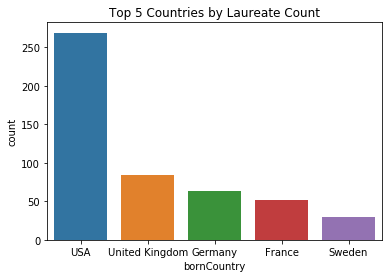

In [40]:
#What countries produced the most Nobel laureates? 
plot = sns.countplot(nobel_prizes['bornCountry'], order=nobel_prizes.bornCountry.value_counts().iloc[:5].index)
plot.set_title('Top 5 Countries by Laureate Count')
plt.show()

It looks like the USA has had by far the most Nobel Laureates over the years. The other top countries are all European. It would be interesting to see how this distribution changes in the next few decades.

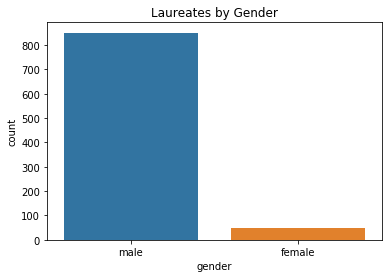

male      851
female     50
Name: gender, dtype: int64


In [41]:
#What is the gender breakdown of laureates? 
plot = sns.countplot(nobel_prizes['gender'], order=nobel_prizes.gender.value_counts().iloc[:5].index)
plot.set_title('Laureates by Gender')
plt.show()
print(nobel_prizes['gender'].value_counts())


Unsurprisingly, most Nobel laureates are male. 

In [43]:
#Female Nobel Prize Winners
nobel_prizes.loc[nobel_prizes['gender']=='female']

,born,bornCountry,bornCountryCode,died,diedCountry,diedCountryCode,firstname,gender,prizes,surname
5,1867-11-07,Russian Empire (now Poland),PL,1934-07-04,France,FR,Marie,female,"[{'year': '1903', 'category': 'physics', 'shar...","Curie, née Sklodowska"
77,1906-06-28,Germany (now Poland),PL,1972-02-20,USA,US,Maria,female,"[{'year': '1963', 'category': 'physics', 'shar...",Goeppert Mayer
189,1897-09-12,France,FR,1956-03-17,France,FR,Irène,female,"[{'year': '1935', 'category': 'chemistry', 'sh...",Joliot-Curie
225,1910-05-12,Egypt,EG,1994-07-29,United Kingdom,GB,Dorothy Crowfoot,female,"[{'year': '1964', 'category': 'chemistry', 'sh...",Hodgkin
338,1896-08-15,Austria-Hungary (now Czech Republic),CZ,1957-10-26,USA,US,Gerty Theresa,female,"[{'year': '1947', 'category': 'medicine', 'sha...","Cori, née Radnitz"
407,1921-07-19,USA,US,2011-05-30,USA,US,Rosalyn,female,"[{'year': '1977', 'category': 'medicine', 'sha...",Yalow
422,1902-06-16,USA,US,1992-09-02,USA,US,Barbara,female,"[{'year': '1983', 'category': 'medicine', 'sha...",McClintock
429,1909-04-22,Italy,IT,2012-12-30,Italy,IT,Rita,female,"[{'year': '1986', 'category': 'medicine', 'sha...",Levi-Montalcini
432,1918-01-23,USA,US,1999-02-21,USA,US,Gertrude B.,female,"[{'year': '1988', 'category': 'medicine', 'sha...",Elion
447,1942-10-20,Germany,DE,0000-00-00,NaN,NaN,Christiane,female,"[{'year': '1995', 'category': 'medicine', 'sha...",Nüsslein-Volhard


Nearly half (21/50) of female laureates won Nobel prizes in the past 20 years. While male laureates drastically outnumber female winners, the number of female laureates is quickly growing. 

## Dataset 3: College Admission Data

In [77]:
#Read in JSON data
with open(r"C:\Users\Cole\Documents\Machine Learning\Homework 1\Admission_data.json") as f:
    admit_data = json.load(f)
admit = pd.DataFrame(admit_data)
admit

,CGPA,Chance of Admit,GRE Score,LOR,Research,SOP,Serial No.,TOEFL Score,University Rating
0,9.65,0.92,337,4.5,1,4.5,1,118,4
1,8.87,0.76,324,4.5,1,4.0,2,107,4
2,8.00,0.72,316,3.5,1,3.0,3,104,3
3,8.67,0.80,322,2.5,1,3.5,4,110,3
4,8.21,0.65,314,3.0,0,2.0,5,103,2
5,9.34,0.90,330,3.0,1,4.5,6,115,5
6,8.20,0.75,321,4.0,1,3.0,7,109,3
7,7.90,0.68,308,4.0,0,3.0,8,101,2
8,8.00,0.50,302,1.5,0,2.0,9,102,1
9,8.60,0.45,323,3.0,0,3.5,10,108,3


Explore

In [78]:
print(admit.describe())


             CGPA  Chance of Admit   GRE Score        LOR    Research  \
count  500.000000        500.00000  500.000000  500.00000  500.000000   
mean     8.576440          0.72174  316.472000    3.48400    0.560000   
std      0.604813          0.14114   11.295148    0.92545    0.496884   
min      6.800000          0.34000  290.000000    1.00000    0.000000   
25%      8.127500          0.63000  308.000000    3.00000    0.000000   
50%      8.560000          0.72000  317.000000    3.50000    1.000000   
75%      9.040000          0.82000  325.000000    4.00000    1.000000   
max      9.920000          0.97000  340.000000    5.00000    1.000000   

              SOP  Serial No.  TOEFL Score  University Rating  
count  500.000000  500.000000   500.000000         500.000000  
mean     3.374000  250.500000   107.192000           3.114000  
std      0.991004  144.481833     6.081868           1.143512  
min      1.000000    1.000000    92.000000           1.000000  
25%      2.500000  125

In [118]:
admission_data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000
